# KE 5018 - Workshop 2B Sentosa Bank Customer Propensity Modelling

## Import libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
import myUtilities as myUtils

## Load data

In [2]:
cust_df = pd.read_csv(os.path.join('data', 'trialPromoResults.csv'), index_col=0)
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 sex           1000 non-null object
 mstatus       1000 non-null object
 age           1000 non-null float64
 children      1000 non-null int64
 occupation    1000 non-null object
 education     1000 non-null object
 income        1000 non-null float64
 avbal         1000 non-null float64
 avtrans       1000 non-null float64
 decision      1000 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 85.9+ KB


## Explore data

In [3]:
cust_df.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,decision
index,,,,,,,,,,
1,F,married,56.82,1,legal,secondary,3105.39,33003.48,1776.81,None
2,M,widowed,87.35,3,retired,tertiary,4874.08,18941.99,863.56,None
3,M,single,28.75,0,manuf,professional,14232.37,30013.32,3231.14,B
4,F,married,35.71,0,education,postgrad,3214.93,15423.24,1996.09,None
5,M,single,20.53,0,construct,tertiary,3214.93,15423.24,1996.09,None


In [4]:
cust_df.describe()

,age,children,income,avbal,avtrans
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.777720,1.003000,5119.725060,21779.968610,1856.060490
std,14.313917,1.104632,3278.980026,11382.111805,1272.986294
min,18.050000,0.000000,369.520000,814.950000,45.760000
25%,29.395000,0.000000,2545.725000,13984.857500,994.850000
50%,39.945000,1.000000,4329.940000,19956.505000,1485.590000
75%,50.080000,2.000000,7167.150000,27100.500000,2400.497500
max,89.910000,4.000000,19715.690000,78385.030000,8138.310000


In [5]:
cust_df.columns

Index([' sex', ' mstatus', ' age', ' children', ' occupation', ' education',
       ' income', ' avbal', ' avtrans', ' decision'],
      dtype='object')

In [6]:
# Remove whitespaces from column names
cust_df.columns = [ i.replace(' ', '') for i in cust_df.columns ]
cust_df.columns

Index(['sex', 'mstatus', 'age', 'children', 'occupation', 'education',
       'income', 'avbal', 'avtrans', 'decision'],
      dtype='object')

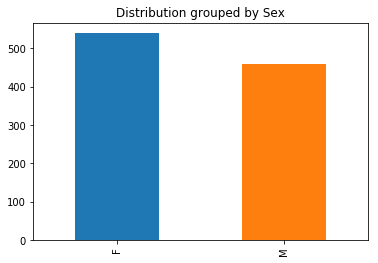

In [7]:
cust_df['sex'].value_counts().plot.bar(title='Distribution grouped by Sex')

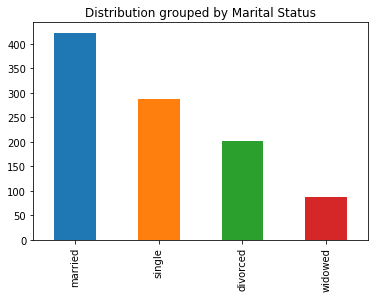

In [8]:
cust_df['mstatus'].value_counts().plot.bar(title='Distribution grouped by Marital Status')

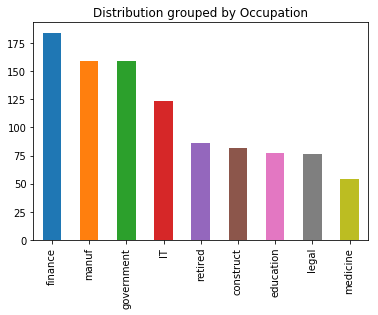

In [9]:
cust_df['occupation'].value_counts().plot.bar(title='Distribution grouped by Occupation')

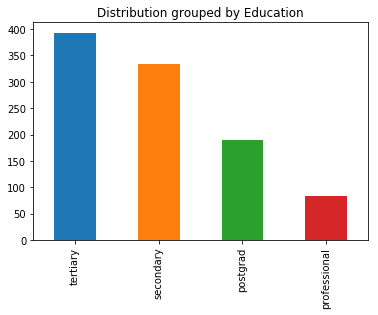

In [10]:
cust_df['education'].value_counts().plot.bar(title='Distribution grouped by Education')

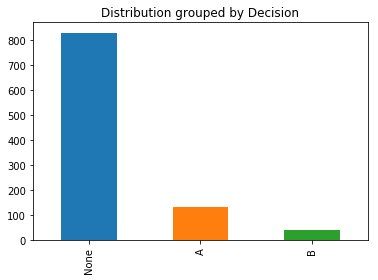

In [11]:
cust_df['decision'].value_counts().plot.bar(title='Distribution grouped by Decision')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9095c00a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9095a65c50>]], dtype=object)

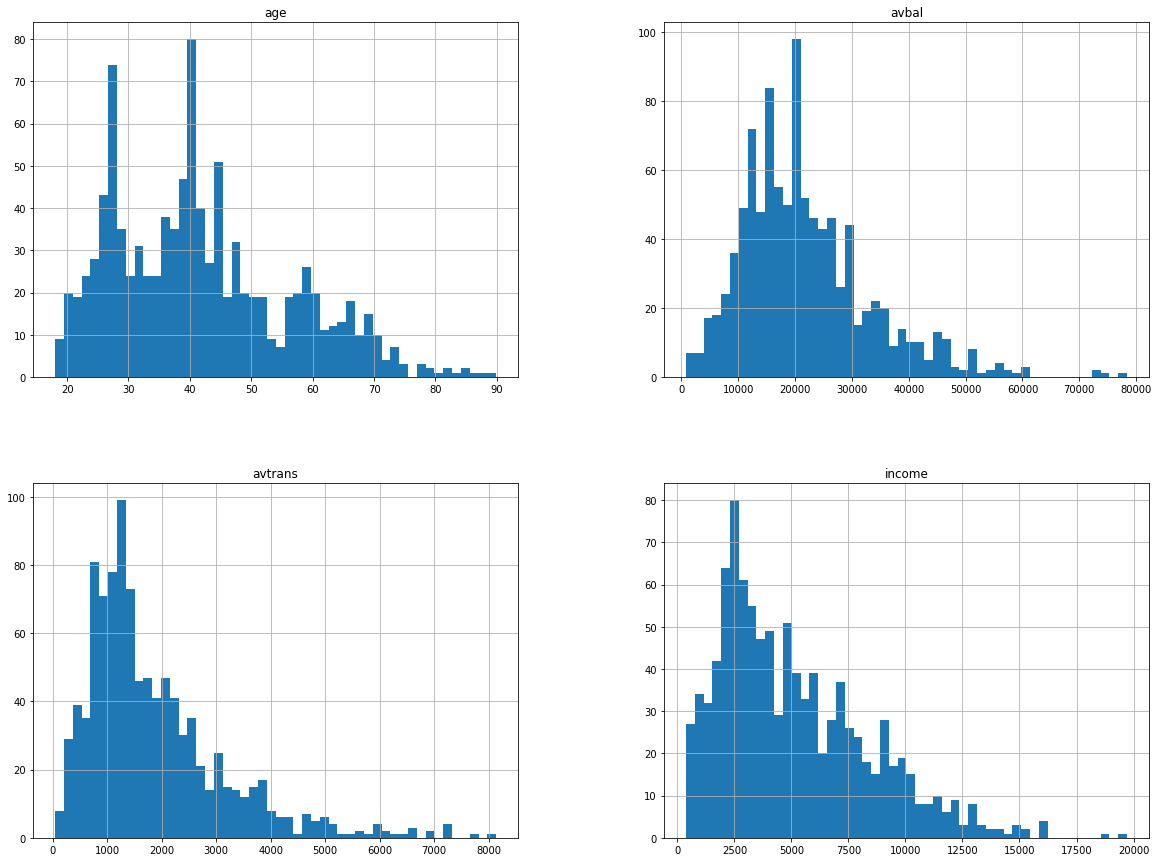

In [12]:
cust_df[['age', 'income', 'avbal', 'avtrans']].hist(bins=50, figsize=(20, 15))

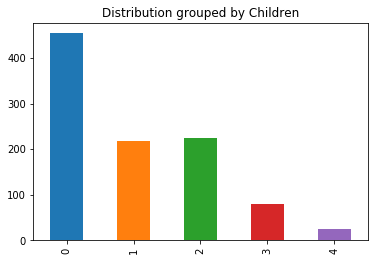

In [13]:
#cust_df['children'].astype(int).hist(bins=[0, 1, 2, 3, 4], figsize=(10, 7))
cust_df['children'].astype(int).value_counts().sort_index().plot.bar(title='Distribution grouped by Children')

## Create the train / test split

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=124)
for train_index, test_index in split.split(cust_df, cust_df['decision']):
    strat_train_df = cust_df.loc[train_index]
    strat_test_df = cust_df.loc[test_index]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df = pd.DataFrame({'all': cust_df['decision'].value_counts().sort_index() / len(cust_df) * 100,
                   'train': strat_train_df['decision'].value_counts().sort_index() / len(strat_train_df)  * 100,
                   'test': strat_test_df['decision'].value_counts().sort_index() / len(strat_test_df) * 100
                   }
                  )
df

,all,test,train
A,13.3,10.5,14.000
B,3.9,4.5,3.750
None,82.8,85.0,82.125


In [16]:
strat_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 405 to 404
Data columns (total 10 columns):
sex           799 non-null object
mstatus       799 non-null object
age           799 non-null float64
children      799 non-null float64
occupation    799 non-null object
education     799 non-null object
income        799 non-null float64
avbal         799 non-null float64
avtrans       799 non-null float64
decision      799 non-null object
dtypes: float64(5), object(5)
memory usage: 68.8+ KB


In [17]:
strat_train_df[strat_train_df.isnull().any(axis=1)]

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,decision
index,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
strat_train_df.drop(0, axis=0, inplace=True)
strat_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 405 to 404
Data columns (total 10 columns):
sex           799 non-null object
mstatus       799 non-null object
age           799 non-null float64
children      799 non-null float64
occupation    799 non-null object
education     799 non-null object
income        799 non-null float64
avbal         799 non-null float64
avtrans       799 non-null float64
decision      799 non-null object
dtypes: float64(5), object(5)
memory usage: 68.7+ KB


In [19]:
strat_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 29 to 779
Data columns (total 10 columns):
sex           200 non-null object
mstatus       200 non-null object
age           200 non-null float64
children      200 non-null int64
occupation    200 non-null object
education     200 non-null object
income        200 non-null float64
avbal         200 non-null float64
avtrans       200 non-null float64
decision      200 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 17.2+ KB


## Data Balancing

In [20]:
strat_train_df['decision'].value_counts()

None    657
A       112
B        30
Name: decision, dtype: int64

In [21]:
strat_train_df['decision'].value_counts() * 100.0 / len(strat_train_df)

None    82.227785
A       14.017522
B        3.754693
Name: decision, dtype: float64

In [22]:
strat_train_df['decision'].value_counts()['None']

657

Let's upsample the classes A and B to 55:25:20. Because there are categorical variables in the dataset, we will just use naive random oversampling.

In [23]:
a_ratio = .25
b_ratio = .2
none_ratio = 1 - a_ratio - b_ratio
none_count = strat_train_df['decision'].value_counts()['None']

a_count = np.ceil(none_count / none_ratio * a_ratio)
b_count = np.ceil(none_count / none_ratio * b_ratio)
print('A = %f\nB = %f' % (a_count, b_count))

A = 299.000000
B = 239.000000


In [24]:
# Convert categorical variables to numerical.
sex_map = {"M": 0, "F": 1}
mstatus_map = {"single":0, "married":1, "widowed":2, "divorced":3}
occupation_map = {'legal':0, 'IT':1, 'government':2, 'manuf':3, 'retired':4, 
                  'finance':5,'construct':6, 'education':7, 'medicine':8}
education_map = {'postgrad':3, 'secondary':0, 'tertiary':1, 'professional':2}
strat_train_df["sex"] = strat_train_df["sex"].map(sex_map)
strat_train_df["mstatus"] = strat_train_df["mstatus"].map(mstatus_map)
strat_train_df["occupation"] = strat_train_df["occupation"].map(occupation_map)
strat_train_df["education"] = strat_train_df["education"].map(education_map)
strat_train_df.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,decision
index,,,,,,,,,,
405,1,0,22.22,0.0,2,3,5636.37,25011.36,2535.67,None
895,0,0,40.84,0.0,8,0,3022.15,19926.25,1798.34,None
697,0,1,35.34,0.0,5,1,4296.81,23993.14,3295.92,None
812,1,0,28.00,0.0,2,0,684.95,12000.74,1082.56,None
253,0,1,39.86,0.0,3,2,6084.82,42728.23,5584.11,None


In [25]:
ovrsamp = RandomOverSampler(ratio={'None': none_count, 'A': int(a_count), 'B': int(b_count)}, random_state=731)
X_ovrsamp, y_ovrsamp = ovrsamp.fit_sample(strat_train_df.iloc[:, :-1], strat_train_df['decision'])

In [26]:
len(X_ovrsamp)

1195

In [27]:
print(sorted(Counter(y_ovrsamp).items()))

[('A', 299), ('B', 239), ('None', 657)]


## Transform data 

In [28]:
X_ovrsamp_df = pd.DataFrame(X_ovrsamp, columns=strat_train_df.columns[:-1])
X_ovrsamp_df.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans
0,1.0,0.0,22.22,0.0,2.0,3.0,5636.37,25011.36,2535.67
1,0.0,0.0,40.84,0.0,8.0,0.0,3022.15,19926.25,1798.34
2,0.0,1.0,35.34,0.0,5.0,1.0,4296.81,23993.14,3295.92
3,1.0,0.0,28.00,0.0,2.0,0.0,684.95,12000.74,1082.56
4,0.0,1.0,39.86,0.0,3.0,2.0,6084.82,42728.23,5584.11


In [29]:
# Convert categorical variables from numerical back to categorical.
sex_map = {0: "M", 1: "F"}
mstatus_map = {0: "single", 1: "married", 2: "widowed", 3: "divorced"}
occupation_map = {0: 'legal', 1: 'IT', 2: 'government', 3: 'manuf', 4: 'retired', 
                  5: 'finance',6: 'construct', 7: 'education', 8: 'medicine'}
education_map = {3: 'postgrad', 0: 'secondary', 1: 'tertiary', 2: 'professional'}
X_ovrsamp_df["sex"] = X_ovrsamp_df["sex"].map(sex_map)
X_ovrsamp_df["mstatus"] = X_ovrsamp_df["mstatus"].map(mstatus_map)
X_ovrsamp_df["occupation"] = X_ovrsamp_df["occupation"].map(occupation_map)
X_ovrsamp_df["education"] = X_ovrsamp_df["education"].map(education_map)
X_ovrsamp_df.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans
0,F,single,22.22,0.0,government,postgrad,5636.37,25011.36,2535.67
1,M,single,40.84,0.0,medicine,secondary,3022.15,19926.25,1798.34
2,M,married,35.34,0.0,finance,tertiary,4296.81,23993.14,3295.92
3,F,single,28.00,0.0,government,secondary,684.95,12000.74,1082.56
4,M,married,39.86,0.0,manuf,professional,6084.82,42728.23,5584.11


In [30]:
num_cols = list(X_ovrsamp_df.columns.to_series().groupby(X_ovrsamp_df.dtypes).groups[np.dtype('float64')])
num_cols

['age', 'children', 'income', 'avbal', 'avtrans']

In [31]:
cat_cols = [ i for i in X_ovrsamp_df.columns if i not in num_cols]
cat_cols

['sex', 'mstatus', 'occupation', 'education']

In [32]:
num_pipeline = Pipeline([
    ('selector', myUtils.DataFrameSelector(num_cols)),
    ('std_scaler', StandardScaler())
])

In [33]:
cat_pipeline = Pipeline([
    ('selector', myUtils.DataFrameSelector(cat_cols)),
    ('label_binarizer', myUtils.LabelBinarizerForPipeline())
])

In [34]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [35]:
X_transf = full_pipeline.fit_transform(X_ovrsamp_df)
X_transf

array([[-1.17710605, -0.86806966,  0.04816959, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12320295, -0.86806966, -0.7182201 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.26088403, -0.86806966, -0.34453836, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [-1.20992802, -0.86806966, -0.69948706, ...,  0.        ,
         1.        ,  0.        ],
       [-1.312584  , -0.86806966,  0.3840012 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.09959031, -0.86806966,  1.42696275, ...,  0.        ,
         0.        ,  1.        ]])

In [36]:
X_transf[0]

array([-1.17710605, -0.86806966,  0.04816959,  0.19313005,  0.39324086,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [37]:
len(X_transf[0])

23

## Save data to file

In [38]:
np.save(os.path.join('data', 'x-train.npy'), X_transf)
np.save(os.path.join('data', 'y-train.npy'), y_ovrsamp)

In [39]:
X_test_trnsf = full_pipeline.fit_transform(strat_test_df.iloc[:, :-1])

In [40]:
np.save(os.path.join('data', 'x-test.npy'), X_test_trnsf)
np.save(os.path.join('data', 'y-test.npy'), strat_test_df['decision'].values)